In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix





# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer/survey lung cancer.csv


In [92]:

dataSet = pd.read_csv("/kaggle/input/lung-cancer/survey lung cancer.csv")
dataSet








,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [93]:
#converting String to numbers
dataSet['GENDER'].replace({'M': 0, 'F': 1}, inplace=True)
dataSet['LUNG_CANCER'].replace({'YES': 1, 'NO': 0}, inplace=True)

dataSet

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [96]:
dataSet.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.475728,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [52]:
from sklearn.model_selection import train_test_split
x = dataSet.drop(['LUNG_CANCER'], axis= 1)
y = dataSet [['LUNG_CANCER']]




In [53]:
trainX ,testX, trainY, testY = train_test_split( x , y ,test_size=0.2 )

testX

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
268,1,55,2,2,2,2,2,2,1,2,1,2,2,2,1
239,1,75,1,2,2,2,1,1,2,2,1,2,1,2,1
22,1,21,2,1,1,1,2,2,2,1,1,1,2,1,1
293,1,56,2,2,2,1,1,2,2,1,1,1,2,1,2
125,1,53,1,2,2,2,2,2,2,1,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,1,56,2,2,2,2,2,1,2,2,2,1,1,2,2
12,1,60,2,1,1,1,1,2,1,1,1,1,2,1,1
184,0,72,2,1,1,1,1,2,2,2,2,2,2,1,2
111,0,61,2,2,2,1,1,2,2,1,2,1,2,2,2


[Text(0.7077702702702703, 0.9583333333333334, 'x[8] <= 1.5\ngini = 0.226\nsamples = 247\nvalue = [32, 215]'),
 Text(0.4966216216216216, 0.875, 'x[13] <= 1.5\ngini = 0.388\nsamples = 110\nvalue = [29, 81]'),
 Text(0.2635135135135135, 0.7916666666666666, 'x[11] <= 1.5\ngini = 0.488\nsamples = 57\nvalue = [24, 33]'),
 Text(0.13513513513513514, 0.7083333333333334, 'x[6] <= 1.5\ngini = 0.492\nsamples = 32\nvalue = [18, 14]'),
 Text(0.05405405405405406, 0.625, 'x[3] <= 1.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.02702702702702703, 0.5416666666666666, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.08108108108108109, 0.5416666666666666, 'x[1] <= 62.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.05405405405405406, 0.4583333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.10810810810810811, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21621621621621623, 0.625, 'x[9] <= 1.5\ngini = 0.483\nsamples = 22\nvalue = [9, 13]'),
 Text(0

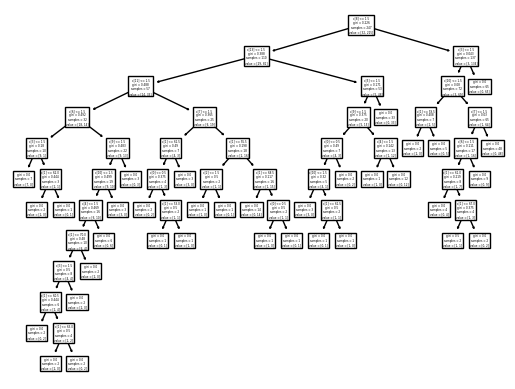

In [97]:
dtc = DecisionTreeClassifier().fit(trainX,trainY)
plot_tree(dtc)


In [98]:
y_predicted = dtc.predict(testX) 
result = confusion_matrix(testY,y_predicted)

    
tp = 5
fn = 2
fp = 3
tn = 52

precision = tp/( tp + fp )
recall = tp/(tp + fn )
specificity = tn / ( fp + tn )
f1 = 2 * ( precision* recall ) / ( precision + recall ) 
precision, recall , specificity , f1


(0.625, 0.7142857142857143, 0.9454545454545454, 0.6666666666666666)

In [99]:
print(f'Precision: {precision *100}%')
print(f'Recall: {recall *100}%')
print(f'Specificity: {specificity *100}%')
print(f'F1: {f1*100}%')

Precision: 62.5%
Recall: 71.42857142857143%
Specificity: 94.54545454545455%
F1: 66.66666666666666%
